In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cl65610/west_nile/master/assets/train.csv')

In [3]:
def to_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df


df = to_date(df)

In [4]:
df


,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
def label_encoding(df, category_list):
    le = LabelEncoder()
    for col in category_list:
        df[col] = le.fit_transform(df[col])
    return df

def date_columns(df):
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df
    

In [6]:
df = label_encoding(df, ['Species', 'Trap'])

In [7]:
df = date_columns(df)

In [16]:
df.month.value_counts()
df.head()
# define a function that makes dummies for 'species', 'day', 'month', 'year' and 'trap', drops those columns, scales the numeric columns

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,day,month,year
Date,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2,41,N OAK PARK AVE,1,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",3,41,N OAK PARK AVE,1,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",3,62,N MANDELL AVE,6,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",2,79,W FOSTER AVE,13,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",3,79,W FOSTER AVE,13,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


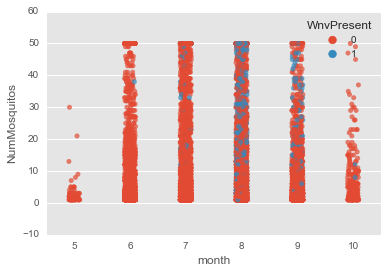

In [14]:
plt.style.use('ggplot')
sns.stripplot(x='month', y='NumMosquitos',data = df, hue = 'WnvPresent', jitter = True, alpha = 0.7)

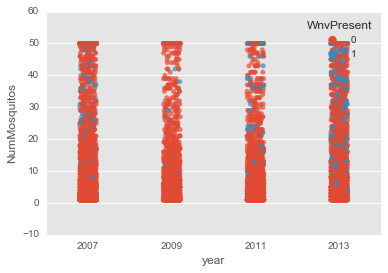

In [15]:
sns.stripplot(x='year', y='NumMosquitos', data=df, hue='WnvPresent', jitter=True, alpha=0.7)